__ML Pipeline__: Prepare data -> __build model__ -> train model -> analyze model's results

### OOP review

When we’re writing programs or building software, there are two key components, __code__ and __data__. With object oriented programming, we orient our program design and structure around objects.

Objects are defined in code using classes. A class defines the object's specification or spec, which specifies what data and code each object of the class should have. When we create an object of a class, we call the object an instance of the class, and all instances of a given class have two core components:

* Methods (code)
* Attributes (data)

The methods represent the code, while the attributes represent the data, and so the methods and attributes are defined by the class.

In a given program, many objects, a.k.a instances of a given class, can exist simultaneously, and all of the instances will have the same available attributes and the same available methods. They are uniform from this perspective. The difference between objects of the same class is the values contained within the object for each attribute. Each object has its own attribute values. These values determine the internal state of the object. The code and data of each object is said to be encapsulated within the object.

### `nn.Module`

As we know, deep neural networks are built using multiple layers. This is what makes the network deep. Each layer in a neural network has two primary components:

* A transformation (code)
* A collection of weights (data)

Within the `nn` package, there is a class called `Module`, and it is the __base class__ for all of neural network modules which includes layers. This means that all of the layers in PyTorch extend the `nn.Module` class and inherit all of PyTorch’s built-in functionality within the `nn.Module` class. In OOP this concept is known as __inheritance__.


#### `forward()` method
When we pass a tensor to our network as input, the __tensor flows__ forward though each layer transformation until the tensor reaches the output layer. This process of a tensor flowing forward though the network is known as a __forward pass__.

Each layer has its own transformation (code) and the tensor passes forward through each layer. The composition of all the individual layer forward passes defines the overall forward pass transformation for the network. The goal of the overall transformation is to transform or map the input to the correct prediction output class, and during the training process, the layer weights (data) are updated in such a way that cause the mapping to adjust to make the output closer to the correct prediction. This is achieved efficiently by __backpropagation__.

What this all means is that, every PyTorch `nn.Module` has a `forward()` method, and so when we are building layers and networks, we must provide an implementation of the `forward()` method. The forward method is the actual transformation.


#### PyTorch’s `nn.functional` package

The `nn.functional` package contains methods that subclasses of `nn.Module` use for implementing their `forward()` functions. One reason for this is that during backpropagation, the network must perform a __symbolic differentiation__ of the operations involved in the layers to calculate the gradient of the loss with respect to the weights.



### Building a neural network in PyTorch

To build a neural net in PyTorch one must extend the nn.Module base class. This is done in two steps:
2. In the class constructor, define the network’s layers as class attributes using pre-built layers from `torch.nn`.
3. Use the network’s layer attributes as well as operations from the `nn.functional` API to implement the `forward()`.



In [41]:
import torch.nn as nn

# a trivial neural net (zero layers)
class Network(nn.Module): 
    def __init__(self):
        super().__init__()
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

In [42]:
# a convolutional neural net
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6,  kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        # dense layers / fully connected layers with bias
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) # the 4*4 is the size of the image 
        self.fc2 = nn.Linear(in_features=120, out_features=60)     # after two convolutions and maxpoolings
        self.out = nn.Linear(in_features=60,  out_features=10)  
        
    def forward(self, t):
        # implement the forward pass
        return t

The above neural net has three hyperparameters that need to be manually specified:
* `kernel_size.`  size of each convolutional filter
* `out_channels` number of filters in the convolutional layer 
* `out_features` size of output tensor, i.e. the number of neurons in the dense layer

Having `out_features=10` on the final output layer is a data dependent hyperparameter, i.e. fixed due to the nature of the problem.



### Exploring weights inside layers

Note that weights are hidden inside each layer object. 


In [43]:
network = Network()
network # __repr__ is inherited from nn.Module, compiles all __repr__ of each layer

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [44]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [45]:
network.fc1

Linear(in_features=192, out_features=120, bias=True)

In [46]:
network.out

Linear(in_features=60, out_features=10, bias=True)

In [47]:
network.conv1.weight # weights of the convolutional layer; these are actually the six  5x5 convolutional filters.

Parameter containing:
tensor([[[[ 0.0013, -0.1838,  0.1159, -0.1213,  0.1073],
          [ 0.0813, -0.1533, -0.1679, -0.0610,  0.0434],
          [ 0.0689,  0.1258,  0.1087, -0.1445,  0.1506],
          [-0.1013,  0.1895, -0.0684, -0.0585, -0.0479],
          [-0.1094, -0.0446, -0.0669, -0.0158, -0.1679]]],


        [[[ 0.0144,  0.0503, -0.1071, -0.1968,  0.0056],
          [-0.1864,  0.0531, -0.1407, -0.0759,  0.1446],
          [ 0.0465,  0.1655, -0.0279,  0.1257,  0.0792],
          [-0.0685,  0.1852,  0.1849, -0.0329, -0.1272],
          [ 0.0141,  0.0478, -0.0752,  0.0727, -0.1708]]],


        [[[-0.0593, -0.0309,  0.0029,  0.1636, -0.0524],
          [-0.0896,  0.0097, -0.1559,  0.0658, -0.0041],
          [ 0.1181, -0.1552, -0.1549,  0.0432,  0.1126],
          [-0.1574, -0.1752, -0.1341, -0.1234,  0.1389],
          [ 0.1101, -0.0588,  0.0723, -0.0442,  0.0714]]],


        [[[ 0.1571, -0.1044,  0.0675,  0.0594,  0.0167],
          [ 0.1895,  0.1502, -0.1481,  0.1079, -0.1997

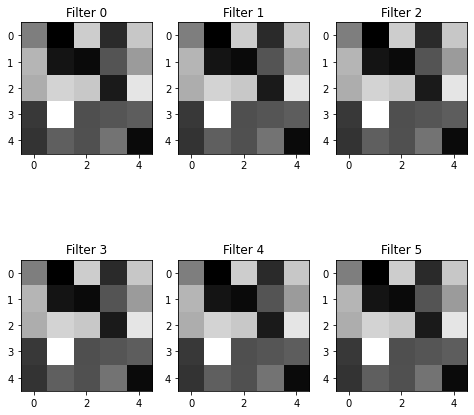

In [48]:
# filters as images (untrained, randomized)
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,8))
for i in range(1,7):
    plt.subplot(2, 3, i)
    plt.imshow(network.conv1.weight[0].squeeze().detach().numpy(), cmap='gray')
    plt.title(f'Filter {i-1}')

In [49]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [50]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

Here the twelve 5$\times$5 stacked filters convolve above six stacked input images which are the output of the first convolution. 

In [51]:
network.fc1.weight.shape

torch.Size([120, 192])

In [52]:
import torch
import numpy as np
x = np.random.random(192)
x.shape

(192,)

In [53]:
network.fc1.weight.matmul(torch.as_tensor(x).float()).shape

torch.Size([120])

The operation `A.matmul(x)` infers due to incompatibility in shape that it must perform $x A^T$ instead of the default $Ax$.

In [54]:
A = np.array([[1, 2],
              [3, 4],
              [0, 0]])

x = np.array([1, 1])

In [55]:
torch.tensor(A).matmul(torch.tensor(x))

tensor([3, 7, 0])

In [56]:
np.matmul(x, A.T)

array([3, 7, 0])

In [57]:
for name, weight in network.named_parameters():
    print(name, '\t', weight.shape)

conv1.weight 	 torch.Size([6, 1, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([12, 6, 5, 5])
conv2.bias 	 torch.Size([12])
fc1.weight 	 torch.Size([120, 192])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([60, 120])
fc2.bias 	 torch.Size([60])
out.weight 	 torch.Size([10, 60])
out.bias 	 torch.Size([10])


In [58]:
network.fc1.weight # 192 weights for each of the 120 output neurons +1 for bias, the bias tensor of size 120.

Parameter containing:
tensor([[ 0.0257, -0.0659, -0.0050,  ..., -0.0175, -0.0640,  0.0102],
        [ 0.0154, -0.0377,  0.0422,  ...,  0.0024,  0.0190,  0.0314],
        [-0.0636, -0.0628,  0.0540,  ..., -0.0513,  0.0422,  0.0587],
        ...,
        [-0.0212, -0.0468,  0.0386,  ..., -0.0329, -0.0143,  0.0330],
        [ 0.0678,  0.0550,  0.0334,  ..., -0.0323,  0.0023,  0.0497],
        [ 0.0557,  0.0211,  0.0108,  ..., -0.0319, -0.0466, -0.0350]],
       requires_grad=True)

For the convolutional layer, we have one scalar value for each filter.  

### Forward method implementation

Forward pass describes how an input tensor is processed as it flows across the layers.

__tensor flow__: 
tensor -> input layer -> hiden layers -> output layer -> tensor

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self, channels=1): # default grayscale
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=channels, out_channels=6, kernel_size=5) 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120) # ((28-5+1)/2 -5 +1)/2 = 4
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t
        print('initial shape is ', t.shape)

        # (2) hidden conv layer
        t = self.conv1(t)
        print('shape after conv1 is ', t.shape)
        t = F.relu(t) # activation_function='relu' in tf.keras  
        print('shape after relu is ', t.shape)    
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        print('shape after maxpool2d 1 is ', t.shape)    
        
        # (3) hidden conv layer
        t = self.conv2(t)
        print('shape after conv2 is ', t.shape)    
        t = F.relu(t)
        print('shape after relu is ', t.shape)    
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        print('shape after maxpool is ', t.shape)    

        # (4) hidden linear layer
        t = t.reshape(-1, 12*4*4)
        print('shape after reshape is ', t.shape)    
        t = self.fc1(t)
        print('shape after fc1 is ', t.shape)    
        t = F.relu(t) # activation_funcion='relu' in tf.keras
        print('shape after relu is ', t.shape)    
        
        # (5) hidden linear layer
        t = self.fc2(t)
        print('shape after fc2 is ', t.shape)    
        t = F.relu(t)
        print('shape after relu is ', t.shape)    
        
        # (6) output layer
        t = self.out(t)
        print('shape after out is ', t.shape)    
        t = F.softmax(t, dim=1) # first index is batch
        print('shape after softmax is ', t.shape)    
        return t

The `.forward()` method expects an image of shape $[b, c, 28, 28]$ i.e. $b$ is batch size of 28$\times$28 grayscale images of shape $[c,28,28]$.

In [60]:
net = Network(3)
t = torch.as_tensor(np.random.random((7,3,28,28))).float() # batch of size 7

net.forward(t).shape # 10 label classes for each image

initial shape is  torch.Size([7, 3, 28, 28])
shape after conv1 is  torch.Size([7, 6, 24, 24])
shape after relu is  torch.Size([7, 6, 24, 24])
shape after maxpool2d 1 is  torch.Size([7, 6, 12, 12])
shape after conv2 is  torch.Size([7, 12, 8, 8])
shape after relu is  torch.Size([7, 12, 8, 8])
shape after maxpool is  torch.Size([7, 12, 4, 4])
shape after reshape is  torch.Size([7, 192])
shape after fc1 is  torch.Size([7, 120])
shape after relu is  torch.Size([7, 120])
shape after fc2 is  torch.Size([7, 60])
shape after relu is  torch.Size([7, 60])
shape after out is  torch.Size([7, 10])
shape after softmax is  torch.Size([7, 10])


torch.Size([7, 10])

In [61]:
(net(t) == net.forward(t)).all()

initial shape is  torch.Size([7, 3, 28, 28])
shape after conv1 is  torch.Size([7, 6, 24, 24])
shape after relu is  torch.Size([7, 6, 24, 24])
shape after maxpool2d 1 is  torch.Size([7, 6, 12, 12])
shape after conv2 is  torch.Size([7, 12, 8, 8])
shape after relu is  torch.Size([7, 12, 8, 8])
shape after maxpool is  torch.Size([7, 12, 4, 4])
shape after reshape is  torch.Size([7, 192])
shape after fc1 is  torch.Size([7, 120])
shape after relu is  torch.Size([7, 120])
shape after fc2 is  torch.Size([7, 60])
shape after relu is  torch.Size([7, 60])
shape after out is  torch.Size([7, 10])
shape after softmax is  torch.Size([7, 10])
initial shape is  torch.Size([7, 3, 28, 28])
shape after conv1 is  torch.Size([7, 6, 24, 24])
shape after relu is  torch.Size([7, 6, 24, 24])
shape after maxpool2d 1 is  torch.Size([7, 6, 12, 12])
shape after conv2 is  torch.Size([7, 12, 8, 8])
shape after relu is  torch.Size([7, 12, 8, 8])
shape after maxpool is  torch.Size([7, 12, 4, 4])
shape after reshape is 

tensor(True)

In [62]:
# the 6 filters in the first conv layer are 3x5x5 matrices in this case, threefold
print(net.conv1.weight.shape)
net.conv1.weight[0] # weights of the first filter

torch.Size([6, 3, 5, 5])


tensor([[[ 0.0685, -0.0194, -0.0345,  0.0304,  0.0971],
         [ 0.1128,  0.0178, -0.0512, -0.0345,  0.0363],
         [-0.0933, -0.0103, -0.0920, -0.0476, -0.0067],
         [-0.0632,  0.0690,  0.1125, -0.0010,  0.0961],
         [ 0.0802, -0.0862,  0.0113,  0.0773,  0.0650]],

        [[ 0.0490, -0.1000,  0.0010, -0.1133,  0.0722],
         [-0.0042,  0.0874,  0.0875, -0.0009,  0.0876],
         [ 0.0405, -0.0131, -0.0021,  0.0934,  0.0134],
         [-0.1108, -0.1152, -0.0856, -0.0551,  0.0049],
         [ 0.0429,  0.0345,  0.0499, -0.0655,  0.0809]],

        [[-0.0961, -0.0727,  0.0223, -0.0416, -0.0549],
         [ 0.0764, -0.0050, -0.0268,  0.0622, -0.0890],
         [ 0.0749, -0.0779,  0.0142, -0.0284, -0.0741],
         [-0.0515,  0.0303,  0.0672, -0.0440, -0.0955],
         [ 0.0306,  0.0835,  0.0658,  0.0705, -0.0167]]],
       grad_fn=<SelectBackward0>)

### Tensor shape transformations during forward pass

Here we inspect the transformation of a tensor $t$ as it is passed end-to-end into the network.

In [63]:
net = Network(3)
t = torch.as_tensor(np.random.random((7,3,28,28))).float() # batch of size 7 rgb 28x28 images

In [64]:
t.shape # input layer

torch.Size([7, 3, 28, 28])

In [65]:
t = net.conv1(t)
t.shape

torch.Size([7, 6, 24, 24])

In [66]:
t = F.relu(t) # applied element-wise
t.shape

torch.Size([7, 6, 24, 24])

In [67]:
F.relu(torch.tensor([[[2,-3]], [[1,5]], [[-1,6]]]))

tensor([[[2, 0]],

        [[1, 5]],

        [[0, 6]]])

In [68]:
t = F.max_pool2d(t, kernel_size=2, stride=2)
t.shape

torch.Size([7, 6, 12, 12])

Let's demonstrate how `F.max_pool2d` works.

In [69]:
x = torch.tensor([[[[1,2],[3,4]],[[1,2],[-9,0]]]]).float()

In [70]:
x

tensor([[[[ 1.,  2.],
          [ 3.,  4.]],

         [[ 1.,  2.],
          [-9.,  0.]]]])

In [71]:
x.shape

torch.Size([1, 2, 2, 2])

In [72]:
F.max_pool2d(x, kernel_size=2, stride=2)

tensor([[[[4.]],

         [[2.]]]])

In [73]:
F.max_pool2d(x, kernel_size=2, stride=2).shape

torch.Size([1, 2, 1, 1])

In [74]:
t = net.conv2(t)
t.shape

torch.Size([7, 12, 8, 8])

In [75]:
t = F.max_pool2d(t, kernel_size=2, stride=2)
t.shape

torch.Size([7, 12, 4, 4])

In [76]:
t = t.reshape(-1, 12*4*4)
t.shape

torch.Size([7, 192])

In [77]:
t = net.fc1(t)
t.shape

torch.Size([7, 120])

In [78]:
t = net.fc2(t)
t.shape

torch.Size([7, 60])

In [79]:
t = net.out(t)
t = F.softmax(t, dim=1)

In [80]:
t.shape

torch.Size([7, 10])

#### Convolutional layer output formula
$$ O = \dfrac{f-n+2p}{s}+1$$

where $f$ is the image size, $n$ is the size of the filter, $p$ is the size of zero padding. To see this, note that the formula is equal to $\dfrac{f-n+s+2p}{s}$ which can be interpreted as ignoring the last stride which covers $n$ pixels, and replacing that with $s$ pixels, dividing everything by $s$ we get the total number of strides, i.e. the size of the resulting image.
$$$$

__Example__. $f = 28$, $n = 5$, $p = 0$ and $s = 1$ in the first convolutional layer, so that $O = 24$.

### Appendix: Basic Theory of Convolutional Neural Networks

Deep Lizard series on CNN:

https://deeplizard.com/learn/video/YRhxdVk_sIs

https://deeplizard.com/learn/video/cNBBNAxC8l4

https://deeplizard.com/learn/video/qSTv_m-KFk0

https://deeplizard.com/learn/video/ZjM_XQa5s6s

https://deeplizard.com/learn/video/gmBfb6LNnZs



F. Chollet's blog: __How convolutional neural networks see the world__

https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

